---

# 4 Getting started with neural networks:

# Classification and regression

In [1]:
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

plt.rcParams['lines.markersize'] = 2  # nice scatter point size
from IPython.display import YouTubeVideo
from IPython.display import clear_output

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # mute some annoying warnings

#### Binary classification: data → scalar (probability of *one* class)

*\"Here is a photo, is it a cat or not?" (Negative/Positive, detecting if something is there, etc.)*

#### Multiclass classification: data → vector (distribution over *many classes*)

*\"Here is a photo, multiple choice for you: is it a cat, a dog, an airplane, a flower, ... ?*

## * Regression: data → scalar (a continuous value describing the data)

*\"Here is a data about a house, what is its price)?* <small>☠️☠️☠️ *Logistic regression* (*classification problem*) ≠ *regression*!!</small>

<!-- ![Classification vs regression](images/ml/Classification-vs-Regression.png) -->
<img src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/Classification-vs-Regression.png?raw=true">

<small>[Sami Belkacem, "Machine learning approaches to rank news feed updates on social media", ResearchGate](https://www.researchgate.net/figure/Classification-vs-Regression_fig2_350993856)</small>

---

# 4.3 Predicting house prices: A regression example

### 4.3.1 The Boston housing price dataset

The IMDB and Reuters (and MNIST) problems are examples of **classification**.

Decide a particular **class** from a finite number of possibilities.

They are **discrete** problems.

**Regression** problems, on the other hand, are **continuous**.

E.g. Predicting tomorrow's temperature, the time to run a marathon or...

1970s house prices in a Boston suburb.

Prices are continuous!

The [Boston Housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) (also on [Kaggle](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)).

The aim is the prediction of the median house price on the basis of knowledge of local property tax, crime rate, rooms per dwelling, accesibility to highways and nine other features.

There are only 506 data samples, split into 404 training and 102 test.

It is a good example of a **small** dataset.

Furthermore, each feature has a **different scale**.

Some features are values in $[0, 1]$, some in $[1, 12]$, some in $[0, 100]$.

<!-- ![Boston boxplots](images/kaggle.boston.png) -->
<img style="height:650px" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/kaggle.boston.png?raw=true">

<small>A **lot** of visualisations of this data: [Prasad Perera, "The Boston Housing Dataset", Kaggle](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)</small>

#### Note on ethics

On the [Keras](https://keras.io/api/datasets/boston_housing/) website (also [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), however [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing) says nothing!), you find:

<!-- <img style="float:right" src="images/boston/keras.boston.png"> -->

<img  style="float:right" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/boston/keras.boston.png?raw=true ">

**B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town**

The study was made in the 1970s. There is a **lot** to say about the history of housing and racial segregation in the United States, and the impact that this still has on the present (see for instance [this talk](https://www.youtube.com/watch?v=Gzo65lP7yOk), also in the reference).

It is a disappointment to me to see that no mention of this is to be found in Chollet's book.

Two alternative datasets are suggested on scikit-learn:
- the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) (rather accessible)
- the [Ames Housing dataset](https://www.openml.org/search?type=data&sort=runs&id=42165&status=active) (more complex)

Unfortunately they are not readily available in TensorFlow.

Two articles to know more:
- ["Revisiting the Boston Housing Dataset", Fairlearn](https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html)
- [M Carlisle, "racist data destruction?", Medium](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)

This is a typical example of the risk of **abstraction** that Data Science: work on numbers only, and come up with models, while not necessarily reflecting on the content, and historical context, of the underlying reality.

We are using the Boston housing dataset in the workshop next week, because it is a good example of a **regression** problem with a **small dataset**, requiring **standardisation**. Also, it's been a staple of data science for a while, and is directly available in TF. In the labs, there is also the option to tackle the same problem using the more recent California Housing dataset.

### Code: loading our dataset

In [2]:
(train_data, train_targets), (test_data, test_targets) = tf.keras.datasets.boston_housing.load_data()
print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


### Examining our dataset

The first sample.

In [3]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


The targets of the first ten samples in thousands of dollars.

In [4]:
train_targets[:10] # multiply by 1000 to get the price in $

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [5]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
for name in column_names[:8]:  # displaying the first 8 columns
    print(f"{name:>10}", end="")
print()
print("-" * 80)
for row in range(8):
    for col in range(8):
        x = train_data[row, col]
        print(f"{x:10.4f}", end="")
    print()

      CRIM        ZN     INDUS      CHAS       NOX        RM       AGE       DIS
--------------------------------------------------------------------------------
    1.2325    0.0000    8.1400    0.0000    0.5380    6.1420   91.7000    3.9769
    0.0218   82.5000    2.0300    0.0000    0.4150    7.6100   15.7000    6.2700
    4.8982    0.0000   18.1000    0.0000    0.6310    4.9700  100.0000    1.3325
    0.0396    0.0000    5.1900    0.0000    0.5150    6.0370   34.5000    5.9853
    3.6931    0.0000   18.1000    0.0000    0.7130    6.3760   88.4000    2.5671
    0.2839    0.0000    7.3800    0.0000    0.4930    5.7080   74.3000    4.7211
    9.1870    0.0000   18.1000    0.0000    0.7000    5.5360  100.0000    1.5804
    4.0974    0.0000   19.5800    0.0000    0.8710    5.4680  100.0000    1.4118


#### Standardisation / Normalisation

These ranges present difficulties.

Neural networks have difficulty adapting to heterogeneous data.

The data will have to be **standardised** / **normalised**.

Note: Chollet uses normalisation as an umbrella term, [as it often happens](https://en.wikipedia.org/wiki/Normalization_(statistics)).

---

## 4.3.1 Preparing the data

### Standardisation

- subtract the **mean** (= **average**);
- divide by the **standard deviation**.

What does this do?

It makes any distribution **centred** at zero, with a **standard deviation** of one.

The math...

$$
\bbox[5px,border:2px solid red]
{
{\frac {X-\mu }{\sigma }}
}
$$

$X$: our data  
$\mu$: the mean
$\sigma$: the standard deviation

### Normalisation

- subtract the **min value**;
- divide by the **range (max value - min value)**.

What does this do?

It squishes any distribution to a range of *\[0, 1\]*.

(We are not using this now.)

The math...

$$
\bbox[5px,border:2px solid red]
{
X'={\frac {X-X_{\min }}{X_{\max}-X_{\min }}}}
$$

$X$: our data   
$X_{\min }$: the min value in our data  
$X_{\max}$: the max value in our data  

Test data is normalised using the mean and standard deviation of the *training* set.

In general, we want the **train** and **test** (and any further data) sets to come for the **same distribution**.

But we also want to keep our **test** aside, not get any influence from it.

Treat it as if was really data our net would encounter *in the wild*.

<!-- <img style="height:300px;float:right" src="images/ml/training-validation-test.png"> -->
<img style="height:300px;float:right" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/training-validation-test.png?raw=true">

<small style="position:absolute;right:0;bottom:0">["Training, Validation and Test sets 차이 및 정확한 용도 (훈련, 검정, 테스트 데이터 차이)"](https://modern-manual.tistory.com/m/19)</small>

In [6]:
mean = train_data.mean(axis=0) # axis 0: along each feature axis!
train_data -= mean             # shift
std = train_data.std(axis=0)
train_data /= std              # rescale

test_data -= mean              # use the mean & std
test_data /= std               # of our training set

How you would do this manually.

In [7]:
def stats(x):
    mean = sum(x) / len(x)                          # compute the mean
    deviations = x - mean                           # deviations can be positive or negative
    avg_sq_deviations = sum(deviations**2) / len(x) # we square them and take the mean
    std = np.sqrt(avg_sq_deviations)                # then we take the square root
    return mean, std

In [8]:
def normalise(x):
    mean, std = stats(x)
    return (x - mean) / std, mean, std # subtract the mean, divide by the standard deviation



```python
                               # IRL you use built-in functions...
mean = x.mean()                # NumPy
std = x.std()

mean = tf.reduce_mean(x)       # TF
std = tf.math.reduce_std(x)
```

In [9]:
def plot_mean_std(nums):
    nums_norm, mean, std = normalise(nums)

    fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))

    ax1.bar([str(x) for x in range(nums.shape[0])], nums)                              # our numbers
    ax1.set_title(f"Original numbers | mean: {mean:.2f}, std: {std:.2f}")
    ax1.plot([mean] * nums.shape[0], linestyle='solid', color="r", label="mean")       # the mean
    ax1.plot([mean + std] * nums.shape[0], linestyle='dotted', color="r", label="std") # mean + std
    ax1.plot([mean - std] * nums.shape[0], linestyle='dotted', color="r")              # mean - std
    ax1.legend()

    ax2.bar([str(x) for x in range(nums_norm.shape[0])], nums_norm)                    # our numbers normalised
    ax2.set_title(f"Normalized | mean: {nums_norm.mean():.2f}, std: {nums_norm.std():.2f}")
    plt.show()

First example, 5 numbers. **Mean**: 30. **Standard deviation** : ~14.

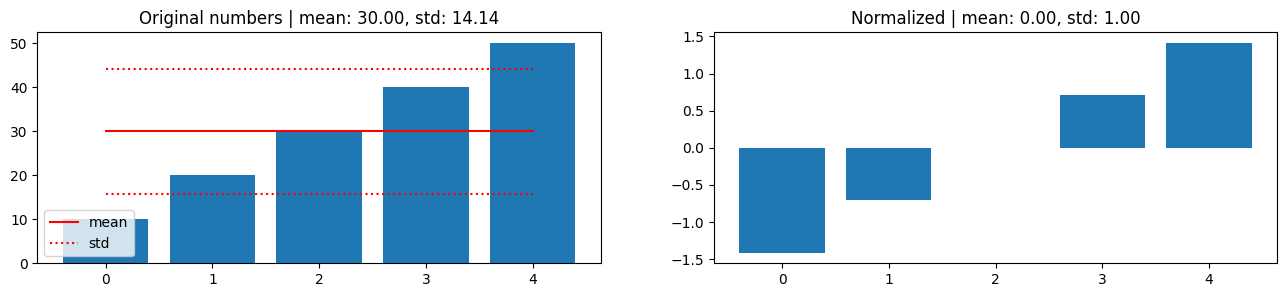

In [10]:
plot_mean_std(np.array([10.0, 20.0, 30.0, 40.0, 50.0]))

Second example, 5 numbers. **Mean**: 30. **Standard deviation** : ~20.

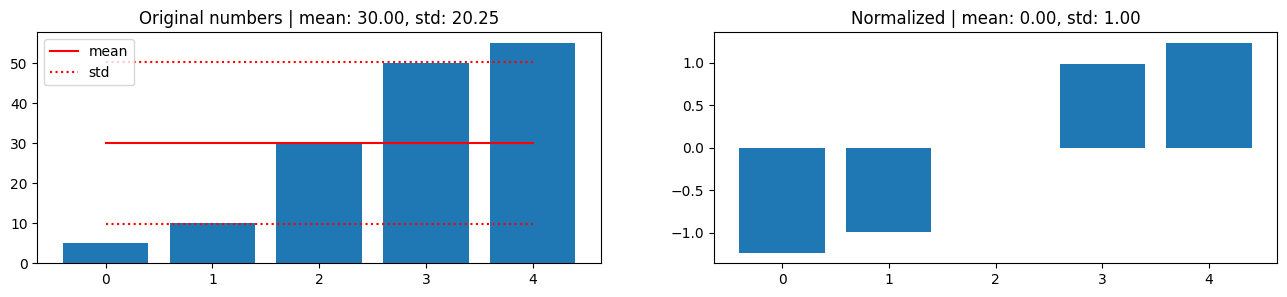

In [11]:
plot_mean_std(np.array([5.0, 10.0, 30.0, 50.0, 55.0]))

---

## 4.3.3 Building your model

We predict the value directly, therefore _no activation_ on the last layer.

### Loss: Mean squared error  (MSE)

A common regression **loss**:

$$
\bbox[5px,border:2px solid red]
{
\text{MSE} = \frac{1}{N} \sum (y_{pred} - y)^2
}
$$

$y$: target  
$y_{pred}$: network output  
$N$: mini-batch size

- continuous and differentiable;
- cost grows exponentially: outliers are penalised.

### Metric: Mean absolute error (MAE)

Our **metric** will be:

$$
\bbox[5px,border:2px solid red]
{
\text{MAE} = \frac{1}{N}\sum |y_{pred} - y |
}
$$

- nondifferentiable ([Keras will still allow you to use it as a loss...](https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative));
- grows linearly: outliers are not more penalised.

In [13]:
def plot_mse_mae():
    nums = np.linspace(-1.5,1.5, 100) # one hundred numbers from -10 to 10

    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,3))

    ax1.plot(nums, nums ** 2)                     # mean squared error (from zero)
    ax1.set_title("Mean squared error (MSE)")
    ax1.set_xlabel("distance from the mean")
    ax1.set_ylabel("loss")
    ax2.plot(nums, np.abs(nums))                  # mean absolute error (from zero)
    ax2.set_title(f"Mean absolute error (MAE)")
    ax2.set_xlabel("distance from the mean")
    ax2.set_ylabel("loss")
    plt.show()

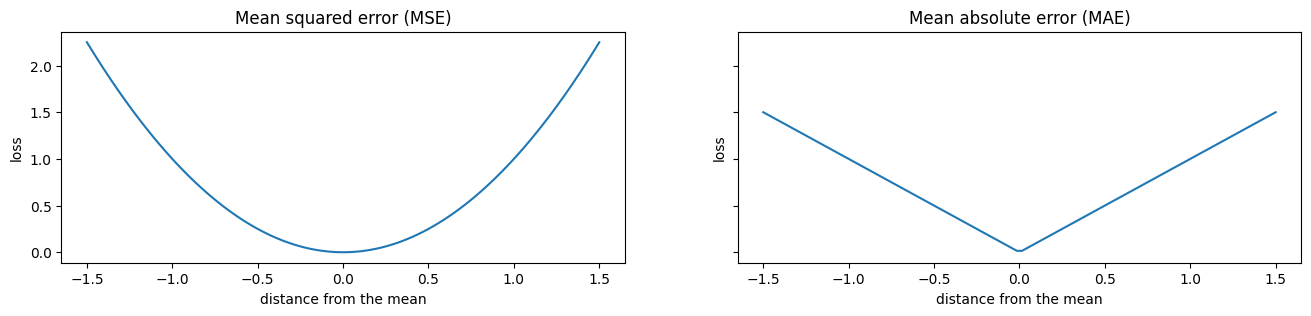

In [14]:
plot_mse_mae()

### Code: build the model

In [12]:
def build_model(clear=True): # modular programming!
    if clear:
        tf.keras.backend.clear_session()
    model=tf.keras.models.Sequential()
    model.add(tf.keras.Input((train_data.shape[1],))),
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
            # ↓ NO ACTIVATION! We just predict (any) number
    model.add(tf.keras.layers.Dense(1))
            # ↑ -------------------------------------------
    model.compile(
        optimizer='rmsprop',
        loss='mse',            # ← MSE: mean squared error
        metrics=['mae']        # ← MAE: mean absolute error
    )
    return model

---

## 4.3.4 Validating your approach using K-fold validation

### Techniques for very small datasets

The training set is **small** and if we split it to have a a validation set it will be even smaller.

(The validation set would be tiny.)

The validation scores – on a tiny validation set – would be very sensitive to the constitution of that set.

### $K$-fold cross-validation

A common solution for small datasets.

The data is spilt into $K$ partitions (usually 4 or 5).

$K$ identical models are instantiated.

One of the $K$s is validation, the rest is train.

We then rotate which partition is the validation.

A new network is trained and validated on each of these *fold*.

The validation score is the **average** of the $K$ validation scores.

This technique mitigates **validation variance**.

<!-- ![Chollet K-fold](images/ml/chollet.k-fold.png) -->
<img style="height:600px" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/chollet.k-fold.png?raw=true">

<small>DLWP, p. 116</small>

### Code: loading and standardising our dataset

In [15]:
(train_data, train_targets), (test_data, test_targets) = tf.keras.datasets.boston_housing.load_data()

mean = train_data.mean(axis = 0)
train_data -= mean # shift
std = train_data.std(axis = 0)
train_data /= std # rescale

test_data -= mean
test_data /= std

### Before training: commonsense baseline / evaluate untrained model

#### Compute dataset statistics

What are the max, min, mean and variance of our test targets?

In [16]:
test_targets_min, test_targets_max = test_targets.min(), test_targets.max()
test_targets_mean, test_targets_std = test_targets.mean(), test_targets.std()
print(f"Test prices, min: {test_targets_min:.4f} (~{int(test_targets_min)*1000:,}$) | max:  {test_targets_max:.4f} (~{int(test_targets_max)*1000:,}$)")
print(f"Mean of our test prices: {test_targets_mean:.4f} (~{int(test_targets_mean)*1000:,}$)")
print(f"STD of our test prices:  {test_targets_std:.4f} (~{int(test_targets_std)*1000:,}$)")

Test prices, min: 5.6000 (~5,000$) | max:  50.0000 (~50,000$)
Mean of our test prices: 23.0784 (~23,000$)
STD of our test prices:  9.1238 (~9,000$)


#### Regression baseline: predicting the mean

What score do we get if we just predict the mean?

In [17]:
mean_prediction = []
test_targets_mean = test_targets.mean()
for test in test_targets:                                     # a very plain loop!
    mean_prediction.append(np.abs(test - test_targets_mean))  # MAE using the mean of our test dataset
mean_prediction_mae = np.array(mean_prediction).mean()
print(f"Predicting the mean of our test_set: {test_targets_mean:.5f} (~{int(test_targets_mean)*1000:,}$)")
print(f"MAE: {mean_prediction_mae:.4f} (~{int(mean_prediction_mae)*1000:,}$)")

Predicting the mean of our test_set: 23.07843 (~23,000$)
MAE: 6.5990 (~6,000$)


#### 'Neural' baseline: our untrained model

In [18]:
test_mse_score, test_mae_score = build_model().evaluate(test_data, test_targets, verbose=0)
test_mse_score_sqrt = np.sqrt(test_mse_score)
msg =  f"MSE: {test_mse_score:.4f}, sqrt: {test_mse_score_sqrt:.4f} "
msg += f"(~{round(test_mse_score_sqrt*1000):,}$) | "
msg += f"MAE: {test_mae_score:.4f} (~{int(test_mae_score)*1000:,}$)"
print(msg)

MSE: 618.4594, sqrt: 24.8688 (~24,869$) | MAE: 23.1082 (~23,000$)


### Code: Training with K-Fold validation

In [19]:
K = 4
num_val_samples = len(train_data) // K
num_epochs = 100
all_scores = []

for i in range(K):
    print(f"Processing fold {i+1}")
                                                          # 1. Validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data, val_targets = train_data[a : b], train_targets[a : b]

                                                          # 2. Training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)

    model = build_model()                                 # 3. Build the Keras model (already compiled)

    model.fit(partial_train_data, partial_train_targets,  # 4. Train the model (in silent mode, verbose=0)
              epochs=num_epochs, batch_size=16, verbose=0)

                                                          # 5. Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4


### Code: Validation results

The fold MAE scores, and their range.

In [20]:
print(f"Validation MAE scores for each fold:")
for score in all_scores:
      print(f"{score:.4f} (~{int(score * 1000):,}$)")

Validation MAE scores for each fold:
1.8502 (~1,850$)
2.4019 (~2,401$)
2.4527 (~2,452$)
2.3753 (~2,375$)


In [21]:
min_score, max_score = min(all_scores), max(all_scores)
print(f"Validation MAE scores range from:")
print(f"{min_score:.4f} (~{int(min_score * 1000):,}$) to")
print(f"{max_score:.4f} (~{int(max_score * 1000):,}$)")

Validation MAE scores range from:
1.8502 (~1,850$) to
2.4527 (~2,452$)


The fold MAE scores mean.

In [22]:
val_mae_mean = np.mean(all_scores)
print(f"Validation MAE mean:")
print(f"{val_mae_mean:.4f} (~{int(val_mae_mean * 1000):,}$)")

Validation MAE mean:
2.2700 (~2,270$)


The average MAE is significant since the prices range from \\$5,000 to \\$50,000

---

## More epochs & smoothing

We will now extend the run to 500 epochs and use a `history` object to record validation MAE at each epoch.

#### Callbacks

The `Model.fit()` has a parameter, `callbacks`, allowing us to add functionalities to be run at various points in our training. This is highly customizable.

See this [tutorial](https://www.tensorflow.org/guide/keras/custom_callback).

#### Code: custom callback

In [23]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):                                            # by passing epochs at initialization
        super(tf.keras.callbacks.Callback, self).__init__()                # I can use this as our total in on_epoch_begin
        self.epochs = epochs
    def on_epoch_begin(self, epoch, logs=None):                            # run at the start of each epoch
        c = ['|', '/', '-', '\\']
        clear_output(wait=True)
        print(f"{c[epoch % 4]} epoch: {epoch+1}/{self.epochs}")  # run at the very end of training
    def on_train_end(self, logs=None):
        print()

### Code: longer K-fold training

In [24]:
K = 4
num_val_samples = len(train_data) // K
num_epochs = 500
all_mae_histories = []

for i in range(K):
    print(f"Processing fold {i+1}")

    a, b = i * num_val_samples, (i + 1) * num_val_samples          # 1. Validation data: data from partition i
    val_data, val_targets = train_data[a : b], train_targets[a : b]

                                                                   # 2. Training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)

    model = build_model()                                          # 3. Build the Keras model (already compiled)

    history = model.fit(
        partial_train_data, partial_train_targets,                 # 4. Train the model (in silent mode, verbose=0)
        epochs=num_epochs, batch_size=16, verbose=0,
        validation_data=(val_data, val_targets),
        callbacks=[CustomCallback(num_epochs)]                     # (← Callback object is passed to `Model.fit()`)
    )
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold 1
\ epoch: 500/500
Processing fold 2
\ epoch: 500/500
Processing fold 3
\ epoch: 500/500
Processing fold 4
\ epoch: 500/500


### Code: plotting results

In [25]:
# take the mean of all four folds for each epoch
average_mae_history = np.array(all_mae_histories).mean(axis=0)

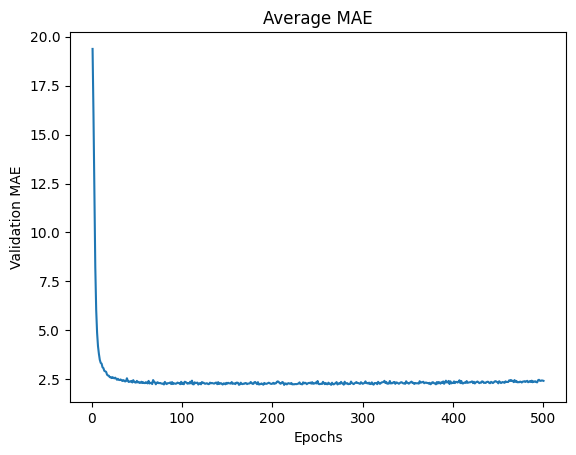

In [26]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Average MAE")
plt.show()

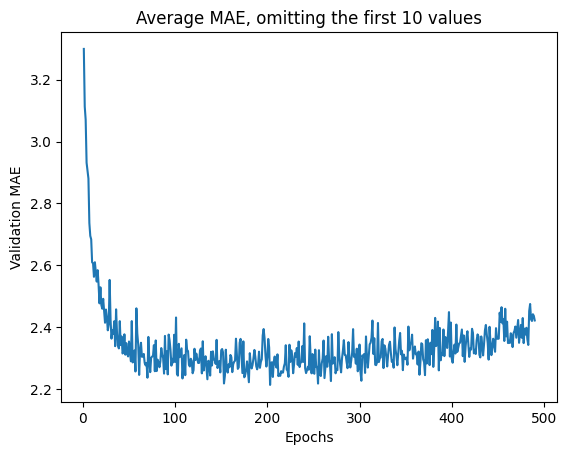

In [27]:
plt.plot(range(1, len(average_mae_history[10:]) + 1), average_mae_history[10:])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Average MAE, omitting the first 10 values")

plt.show()

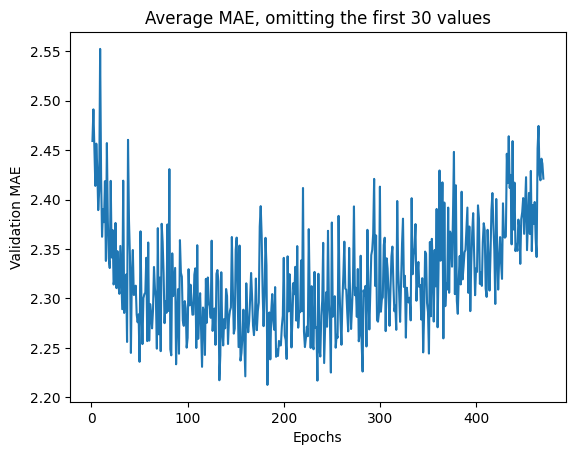

In [28]:
plt.plot(range(1, len(average_mae_history[30:]) + 1), average_mae_history[30:])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Average MAE, omitting the first 30 values")
plt.show()

### Code: smoothing results (EMA)

The code to smooth data by replacing each data point with a weighted sum of itself and the previous smoothed point.

In [29]:
def smooth_curve(points, beta = 0.9):       # beta must be between 0 and 1!
    smoothed_points = []
    for current in points:
        if smoothed_points:                 # (an nonempty list is 'True')
            previous = smoothed_points[-1]  # the last appended point
                                            # ↓ a weighted sum of previous & point, controlled by beta
            smoothed_points.append(beta * previous + (1 - beta) * current)
        else:
            smoothed_points.append(current) # at the start, the list is empty, we just add the first point
    return smoothed_points

#### Exponential Moving Averages

This is the same technique we briefly saw when we talked about *momentum*.

<!-- <img style="height:550px;float:right" src="images/andrew-ng-exponentially-weighted-averages.png"> -->
<img style="height:550px;float:right" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/andrew-ng-exponentially-weighted-averages.png?raw=true">


<small style="position:absolute;bottom:0;right:0">[Andrew Ng, Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization (Course 2 of the Deep Learning Specialization)](https://www.youtube.com/watch?v=k8fTYJPd3_I&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=20).</small>

#### Code: smoothed plot

The smoothed outcome, omitting the first 30 points

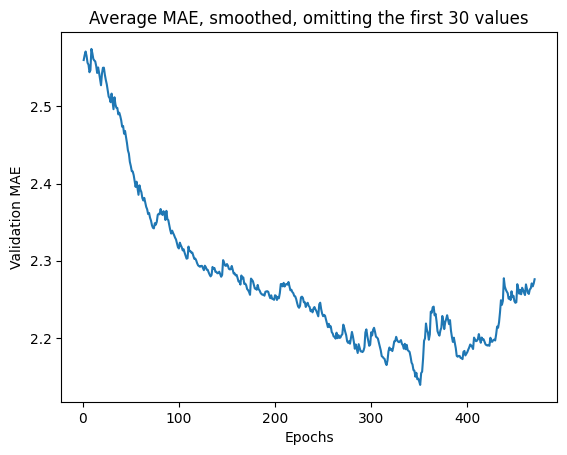

In [31]:
smooth_mae_history = smooth_curve(mae_history[30:]) # from 30 onward

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Average MAE, smoothed, omitting the first 30 values")
plt.show()

### Code: automatic best epoch extraction 

Lowest MAE occurs at epoch...

In [32]:
print(np.argmin(average_mae_history)) # compare with smooth_mae_history

212


---

## Final model

We train a new model:
- on the whole training data
- until the epoch with lowest MAE

### Code: build and train with early stopping

In [33]:
model = build_model()
model.fit(
    train_data, # ← WHOLE TRAINING DATA
    train_targets,
           # ↓ EPOCH WITH LOWEST MAE ----------
    epochs = np.argmin(average_mae_history) + 1, # could do another run with smooth_mae_history as well
           # ↑ --------------------------------
    batch_size = 16
)

Epoch 1/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 548.8683 - mae: 21.5348
Epoch 2/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 382.8077 - mae: 17.5065 
Epoch 3/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212.5397 - mae: 12.3451 
Epoch 4/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.6883 - mae: 7.9337 
Epoch 5/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.0119 - mae: 5.3065 
Epoch 6/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.8147 - mae: 4.0337
Epoch 7/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.4276 - mae: 3.5552 
Epoch 8/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.1426 - mae: 3.2854 
Epoch 9/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3070 - mae: 3.0573 
Epoch 10/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0052 - mae: 2.7536
Epoch 11/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1033 - mae: 2.9314 
Epoch 12/213
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1458 - mae: 2.7199
Epoch 13/

### Code: evaluate on the test set

In [34]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=0)
test_mse_score_sqrt = np.sqrt(test_mse_score)
msg =  f"MSE: {test_mse_score:.4f}, sqrt: {test_mse_score_sqrt:.4f} "
msg += f"(~{round(test_mse_score_sqrt*1000):,}$) | "
msg += f"MAE: {test_mae_score:.4f} (~{int(test_mae_score*1000):,}$)"
print(msg)

MSE: 10.1040, sqrt: 3.1787 (~3,179$) | MAE: 2.2628 (~2,262$)


---

## 4.3.6 Wrapping up

### Workflow

1. Prepare the data & split into Train/Validation/Test
2. Define your model
3. Evaluate your untrained model / a **commonsense baseline**
4. Train using **Train/Validation**
5. Tweak **hyperparameters** → pick best validation results
5. Evaluate on **Test**

### Summary

#### Inputs

- **Standardise/normalise** if the features are in different ranges;

##### Labels

- Just a number, meaning **no activation** in the last layer;

#### Key ideas

- **Do you know your data??**
- Overfitting;
- Commonsense baselines;
- K-fold validation (for small datasets);

### Regression

- We predict a **continuous value** (the price of a house);
- The final layer has **no activation**;
- The loss function is the **mean squared error**: `mse`;
- Instead of accuracy, use the **mean average error** `mae`;
- The model outputs the **desired output** (scaled).

### Experiments

- More or fewer hidden layers – 32 units, 64 units etc.;
- Try different learning rates;
- Replace `relu` with an early neural network favourite, `tanh`;
- Try the [`Adam` optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes_2): `optimizers.Adam(learning_rate=0.001)`